In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyflux as pf
import numpy as np
import random

%matplotlib inline

In [2]:
df_air_tokyo = pd.read_csv('./../data/restaurant/tokyo/tokyo_air_visit.csv')
df_air_tokyo.rename(columns = {'visit_date' : 'date'}, inplace = True)
df_air_all = pd.read_csv('./../data/restaurant/air_visit_data.csv')
df_air_all.rename(columns = {'visit_date' : 'date'}, inplace = True)

print('Tokyo AIR Restaurant summary:\n', df_air_tokyo.describe())
print('\nAll AIR Restaurant summary:\n', df_air_all.describe())

print('\nTokyo dataset skew: ', df_air_tokyo.skew(axis = 0, skipna = True)) 
print('\nAll dataset skew: ', df_air_all.skew(axis = 0, skipna = True)) 

Tokyo AIR Restaurant summary:
             visitors
count  133063.000000
mean       20.484162
std        16.483387
min         1.000000
25%         9.000000
50%        17.000000
75%        28.000000
max       877.000000

All AIR Restaurant summary:
             visitors
count  252108.000000
mean       20.973761
std        16.757007
min         1.000000
25%         9.000000
50%        17.000000
75%        29.000000
max       877.000000

Tokyo dataset skew:  visitors    4.015848
dtype: float64

All dataset skew:  visitors    3.307629
dtype: float64


Strong positive skew for both Tokyo and All visitor counts.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f04096afd68>,
 'caps': [<matplotlib.lines.Line2D at 0x7f04096c2438>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f04096afc18>,
 'medians': [<matplotlib.lines.Line2D at 0x7f04096c2ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f04096c2e10>,
 'means': []}

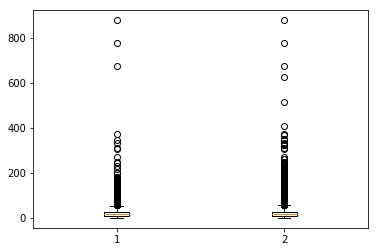

In [3]:
plt.boxplot([df_air_tokyo.visitors, df_air_all.visitors])

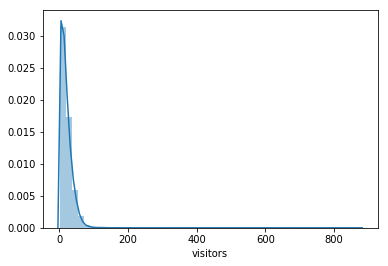

In [4]:
sns.distplot(df_air_tokyo['visitors'])

In [5]:
def find_outliers(df, colName):
    df_sort = df.sort_values([colName])
    q1, q3 = np.percentile(df_sort[colName],[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    return df.loc[df[colName] >= upper_bound]
    
outliers_tokyo = find_outliers(df_air_tokyo, 'visitors')
unique_store_ids_tokyo = outliers_tokyo.air_store_id.unique().tolist()
print('outlier (Tokyo) store count: ', len(unique_store_ids_tokyo))
total_unique_store_ids_tokyo = df_air_tokyo.air_store_id.unique().tolist()
print('total (Tokyo) store count: ', len(total_unique_store_ids_tokyo))

outliers_all = find_outliers(df_air_all, 'visitors')
unique_store_ids_all = outliers_all.air_store_id.unique().tolist()
print('\noutlier (All) store count: ', len(unique_store_ids_all))
total_unique_store_ids_all = df_air_all.air_store_id.unique().tolist()
print('total (All) store count: ', len(total_unique_store_ids_all))

len(outliers_all.loc[outliers_all['visitors'] > 100].air_store_id.unique())
outlier_sample = random.sample(
    outliers_all.loc[outliers_all['visitors'] > 100].air_store_id.unique().tolist(), 10
)
for store_id in outlier_sample:
    print('\nOutlier store id: ', store_id)
    df_store_with_largest_outlier = df_air_tokyo.loc[df_air_tokyo['air_store_id'] == store_id]
    print(df_store_with_largest_outlier.describe())
    print('\nLargest Outlier dataset skew: ', df_store_with_largest_outlier.skew(axis = 0, skipna = True)) 

outlier (Tokyo) store count:  228
total (Tokyo) store count:  444

outlier (All) store count:  450
total (All) store count:  829

Outlier store id:  air_60a7057184ec7ec7
       visitors
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN

Largest Outlier dataset skew:  air_store_id   NaN
date           NaN
visitors       NaN
dtype: float64

Outlier store id:  air_683371d9baabf410
       visitors
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN

Largest Outlier dataset skew:  air_store_id   NaN
date           NaN
visitors       NaN
dtype: float64

Outlier store id:  air_e57dd6884595f60d
       visitors
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN

Largest Outlier dataset skew:  air_store_id   NaN
date           NaN
visitors       NaN
dtype: float64

Out

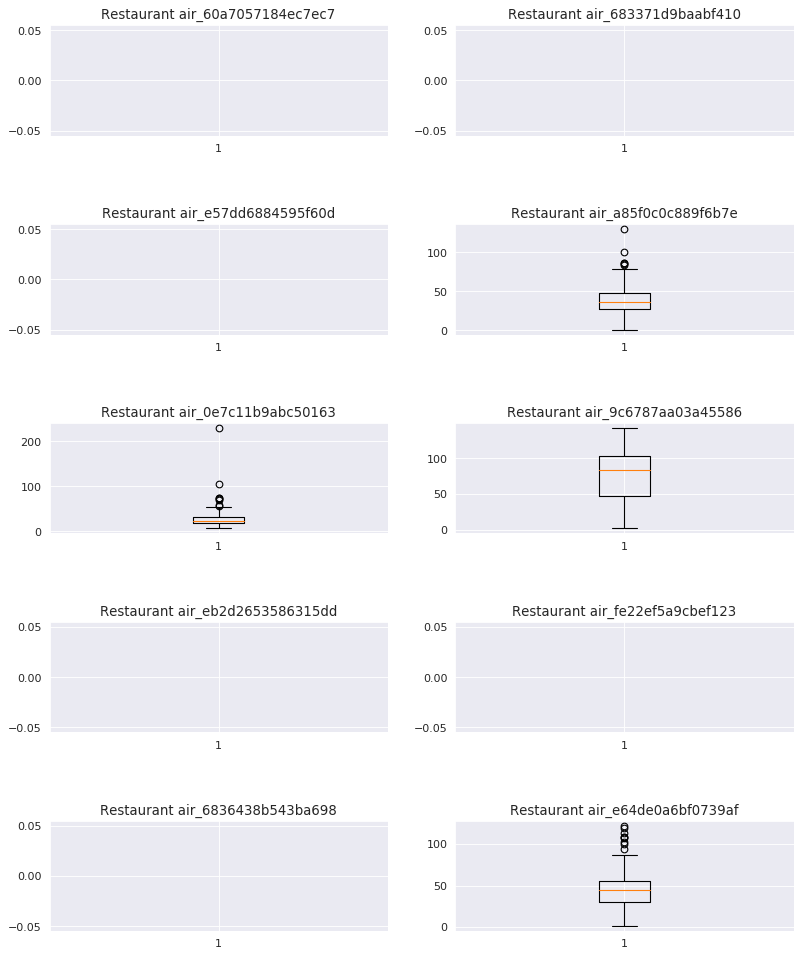

In [6]:
col=2
row=5
ind=1

sns.set_style("darkgrid")

fig1 = plt.figure(figsize=(12, 15), dpi= 80, facecolor='w', edgecolor='k')
fig1.tight_layout()

for store_id in outlier_sample:
    plt.subplot(row,col,ind)
    plt.title('Restaurant ' + store_id)
    df_store_with_largest_outlier = df_air_tokyo.loc[df_air_tokyo['air_store_id'] == store_id]
    plt.boxplot(df_store_with_largest_outlier['visitors'])    
    ind = ind + 1
    
plt.subplots_adjust(hspace=0.8)
plt.show()

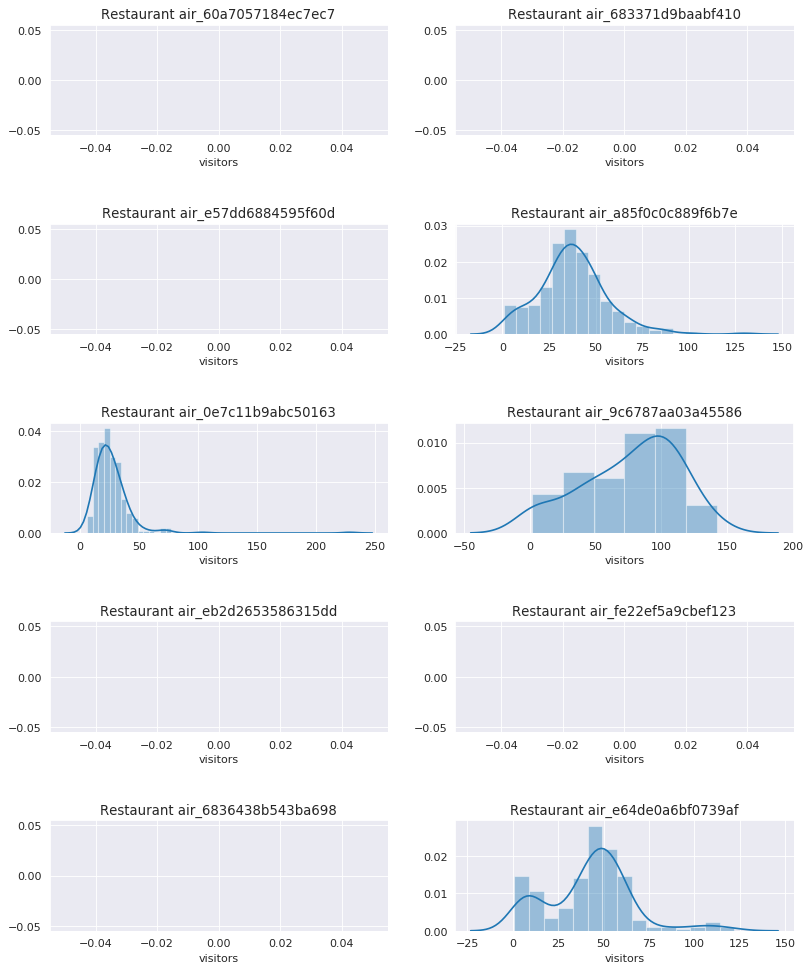

In [7]:
col=2
row=5
ind=1

fig2 = plt.figure(figsize=(12, 15), dpi= 80, facecolor='w', edgecolor='k')
fig2.tight_layout()

for store_id in outlier_sample:
    plt.subplot(row,col,ind)
    plt.title('Restaurant ' + store_id)
    df_store_with_largest_outlier = df_air_tokyo.loc[df_air_tokyo['air_store_id'] == store_id]
    sns.distplot(df_store_with_largest_outlier['visitors'])
    ind = ind + 1
    
plt.subplots_adjust(hspace=0.8)
plt.show()

In [8]:
#Sample a small number of columns 
max_visitor_count = df_air_tokyo['visitors'].max()
df_max_air_store_entry = df_air_tokyo.loc[df_air_tokyo['visitors'] == max_visitor_count]['air_store_id']
print(df_max_air_store_entry)

df_store_with_largest_outlier = df_air_tokyo.loc[df_air_tokyo['air_store_id'] == 'air_cfdeb326418194ff']
print(df_store_with_largest_outlier.describe())

print('\nLargest Outlier dataset skew: ', df_store_with_largest_outlier.skew(axis = 0, skipna = True)) 

39691    air_cfdeb326418194ff
Name: air_store_id, dtype: object
         visitors
count  407.000000
mean    17.090909
std     43.817288
min      1.000000
25%      6.000000
50%     15.000000
75%     22.000000
max    877.000000

Largest Outlier dataset skew:  visitors    18.706208
dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f04081fa6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f04081fada0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f04081fa518>],
 'medians': [<matplotlib.lines.Line2D at 0x7f04081f54e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f04081f5860>],
 'means': []}

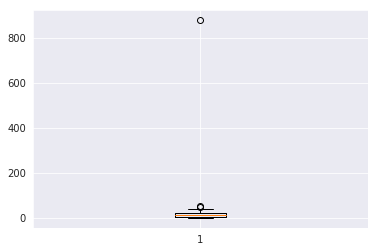

In [9]:
plt.boxplot(df_store_with_largest_outlier['visitors'])

Outlier in this case appears to be way outside the range - can be relatively confident that it's a mistake.

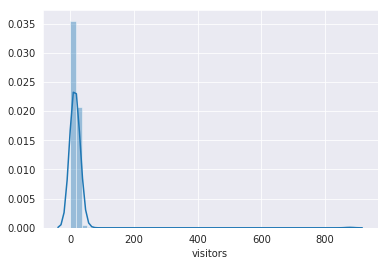

In [10]:
sns.distplot(df_store_with_largest_outlier['visitors'])